# Math 5389 Project 7

### 1. Take a look at the built-in “mtcars”-dataset. Find the dimension of the dataset. 

In [1]:
dim(mtcars)

[1] 32 11

The dataset has 32 rows and 11 columns

### 2. Explore correlation patterns in the “mtcars” dataset. 

In [6]:
mtcars$cyl <- as.numeric(as.character(mtcars$cyl))
mtcars_correl <- cor(mtcars, use="complete.obs")
mtcars_correl

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284


### 3. Visualize correlation patterns with ggcorrplot.

In [26]:
library(ggcorrplot)

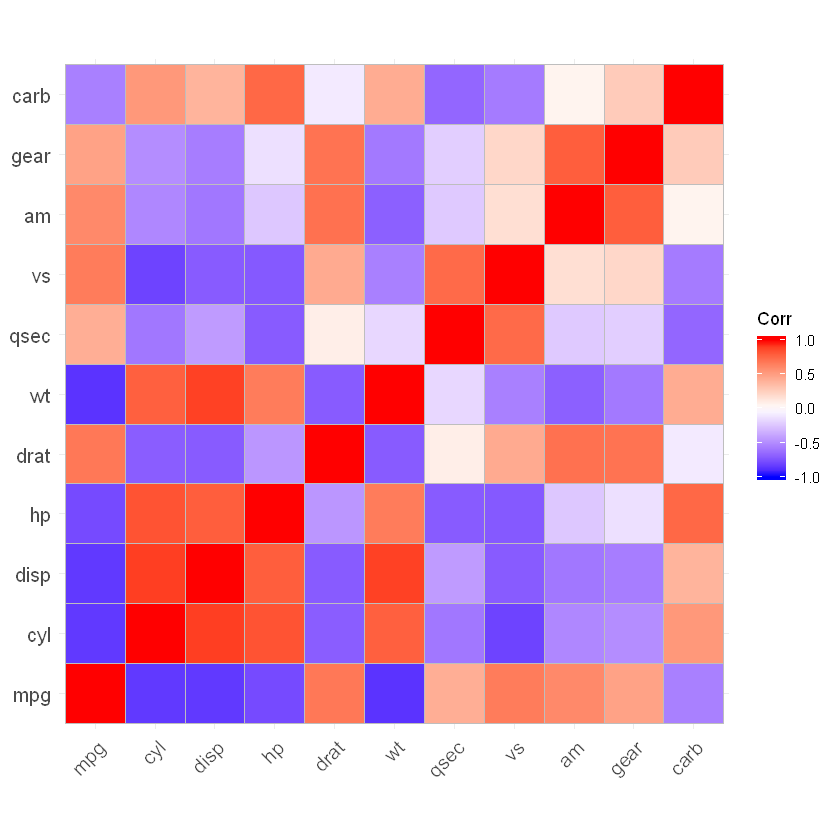

In [27]:
ggcorrplot(mtcars_correl)

### 4.1 Interpret the correlation matrix.

Reddish colors stand for positive correlation and blueish colors stands for negative correlation. The darker the color in the plot means the stronger the correlation

### 4.2 Explain How you would deal with the Curse of Dimensionality?

We need to do feature selection. Firstly, we need to figure out our target variable and choose smaller number of features according to the absolute values of the correlation values.

### 5.1 Use base R's prcomp()command. 

In [31]:
library(dplyr)
 
# Drop the columns of the dataframe
mtcars.pcs <- select (mtcars,-c(vs,am))
mtcars.pcs

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,4,4


### 5.2 You are left with a matrix of 9 columns and 32 rows which is now called “mtcars.pca”, which you pass to the prcomp() function

In [32]:
prcomp(mtcars.pcs)

Standard deviations (1, .., p=9):
[1] 136.5322763  38.1473452   3.0664227   1.2749238   0.9047389   0.6473353
[7]   0.3054162   0.2859218   0.2158806

Rotation (n x k) = (9 x 9):
              PC1          PC2         PC3          PC4         PC5
mpg  -0.038118360  0.009186679  0.98365680  0.040854772 -0.09376515
cyl   0.012035198 -0.003372536 -0.06344057 -0.236548841  0.22554404
disp  0.899573033  0.435385992  0.03123388 -0.005079093 -0.01053658
hp    0.434787255 -0.899322036  0.02541113  0.035168110  0.01667875
drat -0.002660085 -0.003900050  0.03953535 -0.057314901 -0.13086355
wt    0.006239435  0.004860835 -0.08487901  0.133441861 -0.24405170
qsec -0.006671307  0.025010854 -0.07050906  0.910589254 -0.20719280
gear -0.002604770 -0.011272257  0.04811434 -0.130320795 -0.27275503
carb  0.005766046 -0.027779493 -0.10353404 -0.271781001 -0.86367709
              PC6           PC7           PC8          PC9
mpg  -0.133111460  0.0361602003 -2.292248e-02 -0.029482354
cyl  -0.822715264 -0.40

### 5.3. Apply the “summary” command to the dataset “mtcars.pca”. You obtain 9 principal components. Each of these explains a percentage of the total variation in the dataset

In [34]:
summary(prcomp(mtcars.pcs))

Importance of components:
                           PC1      PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     136.532 38.14735 3.06642 1.27492 0.90474 0.64734 0.3054
Proportion of Variance   0.927  0.07237 0.00047 0.00008 0.00004 0.00002 0.0000
Cumulative Proportion    0.927  0.99938 0.99985 0.99993 0.99997 0.99999 1.0000
                          PC8    PC9
Standard deviation     0.2859 0.2159
Proportion of Variance 0.0000 0.0000
Cumulative Proportion  1.0000 1.0000

### 5.4 Which variable represents the greatest percentage of the variation in your dataset? 

PC 1

### 6.1 Create a PCA graph of variables. 

In [38]:
install.packages("FactoMineR")

also installing the dependencies 'Rcpp', 'matrixStats', 'RcppArmadillo', 'zip', 'SparseM', 'MatrixModels', 'conquer', 'sp', 'openxlsx', 'minqa', 'nloptr', 'statmod', 'RcppEigen', 'carData', 'abind', 'pbkrtest', 'quantreg', 'maptools', 'rio', 'lme4', 'car', 'ellipse', 'flashClust', 'leaps', 'scatterplot3d', 'ggrepel'



package 'Rcpp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Rcpp'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Servet\AppData\Local\Continuum\anaconda\Lib\R\library\00LOCK\Rcpp\libs\x64\Rcpp.dll to C:\Users\Servet\AppData\Local\Continuum\anaconda\Lib\R\library\Rcpp\libs\x64\Rcpp.dll: Permission denied"Warning message:
"restored 'Rcpp'"

package 'matrixStats' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'zip' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'conquer' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'openxlsx' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'statmod' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'carData' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'maptools'

In [44]:
library("FactoMineR")

Warning message:
"package 'FactoMineR' was built under R version 3.6.3"

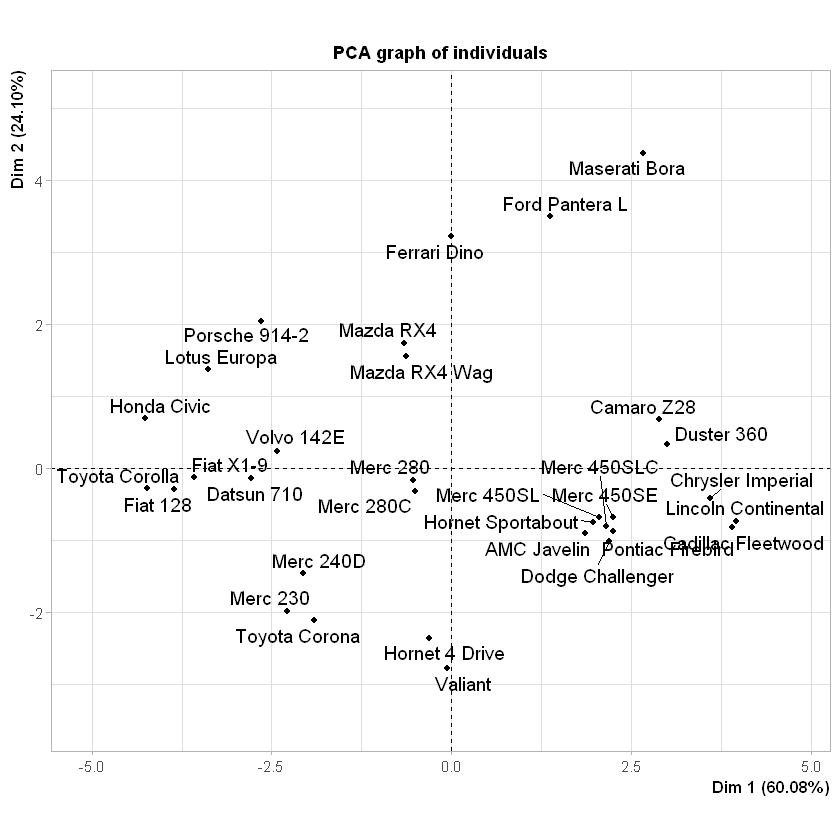

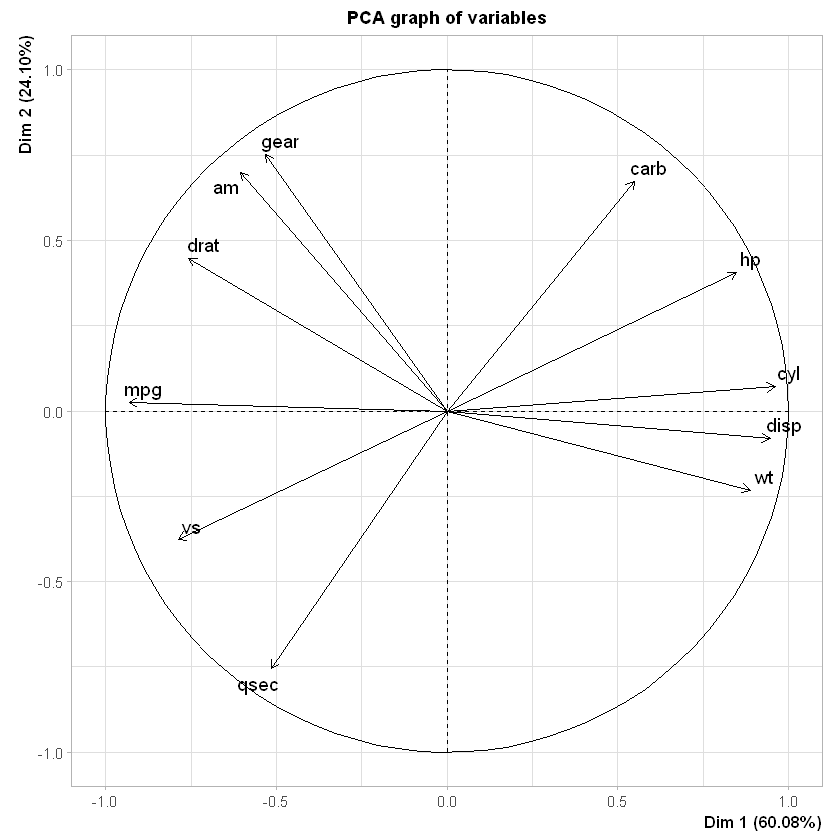

In [47]:
mtcars_pca <- PCA(mtcars)

### 6.2 Interpret the graph. 

The first two dimensions resume 84.18% of the total inertia (the inertia is the total variance of dataset i.e. the trace of the correlation matrix).
MPG correlates negatively with the first dimension while cyl and disp correlates positively.
The first graph shows how each individual cars are located in the first two vectors Dim1 and Dim 2

### 7.1 Find the eigenvalues for the “mtcars_pca” dataset. 

In [48]:
mtcars_pca$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,6.60840025,60.0763659,60.07637
comp 2,2.65046789,24.0951627,84.17153
comp 3,0.62719727,5.7017934,89.87332
comp 4,0.26959744,2.4508858,92.32421
comp 5,0.22345110,2.0313737,94.35558
comp 6,0.21159612,1.9236011,96.27918
comp 7,0.13526199,1.2296544,97.50884
comp 8,0.12290143,1.1172858,98.62612
comp 9,0.07704665,0.7004241,99.32655
comp 10,0.05203544,0.4730495,99.79960


### 7.2 Since eigenvalues <1 would mean that the component actually explains less than a single explanatory variable we would like to discard those. Discard variables based on the eigenvalues and reduce your dimensionality accordingly. 

In [63]:
mtcars.pcs

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,4,4


In [64]:
mtcars_pca_dropped <- select(prcomp(mtcars.pcs), -c(PC3,PC4,PC5,PC6,PC7,PC8,PC9))

ERROR: Error in UseMethod("select_"): no applicable method for 'select_' applied to an object of class "prcomp"


In [55]:
mtcars_pca_dropped <- select (mtcars,-c(vs,am))
mtcars.pcs

ERROR: Error in parse(text = x, srcfile = src): <text>:1:46: unexpected symbol
1: mtcars_pca_dropped <- select (mtcars_pca, if mtcars_pca
                                                 ^


In [65]:
prcomp(mtcars.pcs)

Standard deviations (1, .., p=9):
[1] 136.5322763  38.1473452   3.0664227   1.2749238   0.9047389   0.6473353
[7]   0.3054162   0.2859218   0.2158806

Rotation (n x k) = (9 x 9):
              PC1          PC2         PC3          PC4         PC5
mpg  -0.038118360  0.009186679  0.98365680  0.040854772 -0.09376515
cyl   0.012035198 -0.003372536 -0.06344057 -0.236548841  0.22554404
disp  0.899573033  0.435385992  0.03123388 -0.005079093 -0.01053658
hp    0.434787255 -0.899322036  0.02541113  0.035168110  0.01667875
drat -0.002660085 -0.003900050  0.03953535 -0.057314901 -0.13086355
wt    0.006239435  0.004860835 -0.08487901  0.133441861 -0.24405170
qsec -0.006671307  0.025010854 -0.07050906  0.910589254 -0.20719280
gear -0.002604770 -0.011272257  0.04811434 -0.130320795 -0.27275503
carb  0.005766046 -0.027779493 -0.10353404 -0.271781001 -0.86367709
              PC6           PC7           PC8          PC9
mpg  -0.133111460  0.0361602003 -2.292248e-02 -0.029482354
cyl  -0.822715264 -0.40

### 8.1 Draw a screeplot. 

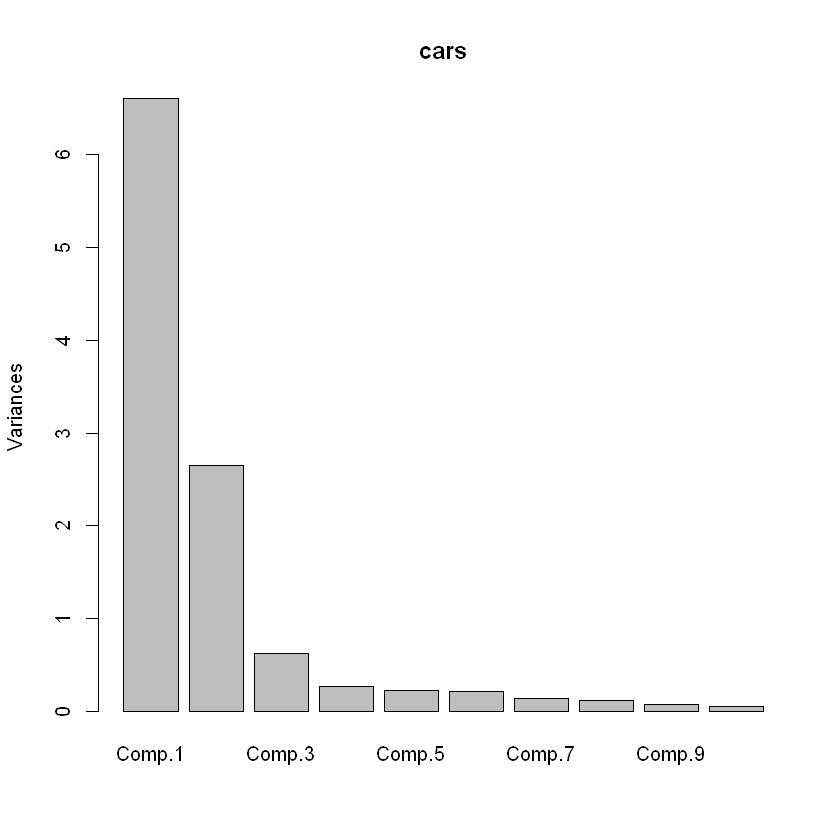

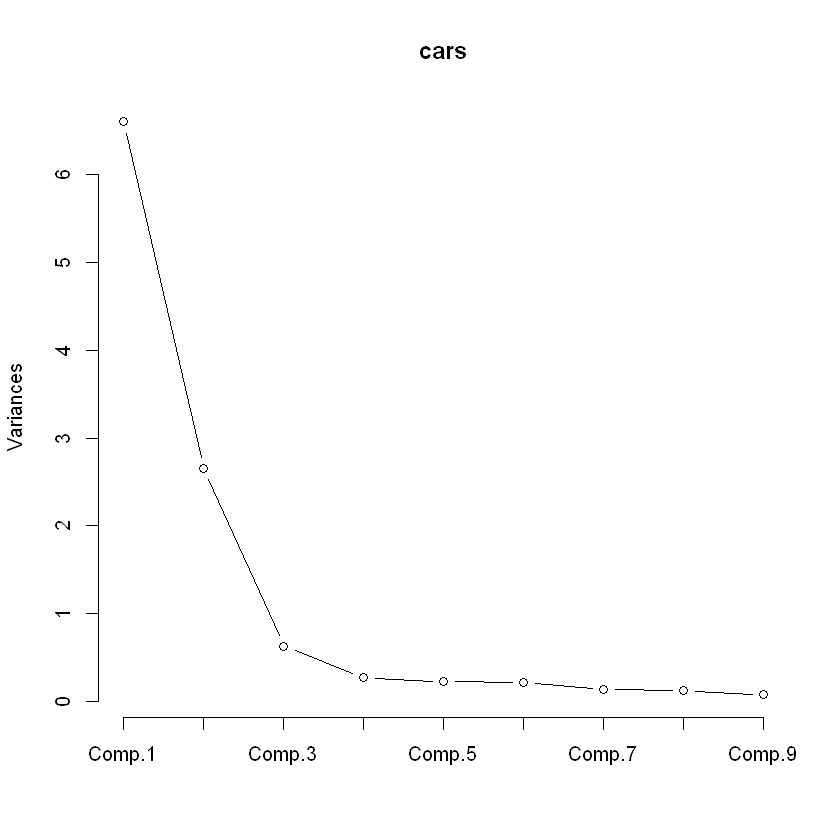

In [79]:
cars <- princomp(covmat = mtcars_correl)
screeplot(cars)
screeplot(cars, npcs = 9, type = "lines")

### 9.1 Discuss your conclusion.

Since there is an elbow shape in Comp3, choosing the first three components will performa great model without losing too much information.

### 9.2 Explain why you used the eigenvalues and vectors of the coefficient matrix.

The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude.